<a href="https://colab.research.google.com/github/rosymaple/CookBook_manager_candace_vogel/blob/main/Copy_of_handwritingrecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 0.  0.  0.  5. 14. 12.  2.  0.]
 [ 0.  0.  7. 15.  8. 14.  4.  0.]
 [ 0.  0.  6.  2.  3. 13.  1.  0.]
 [ 0.  0.  0.  1. 13.  4.  0.  0.]
 [ 0.  0.  1. 11.  9.  0.  0.  0.]
 [ 0.  8. 16. 13.  0.  0.  0.  0.]
 [ 0.  5. 14. 16. 11.  2.  0.  0.]
 [ 0.  0.  0.  6. 12. 13.  3.  0.]]
2
1797
Original data shape (1797, 8, 8)
Reshaped data shape (1797, 64)
Example original [[ 0.  0.  0.  5. 14. 12.  2.  0.]
 [ 0.  0.  7. 15.  8. 14.  4.  0.]
 [ 0.  0.  6.  2.  3. 13.  1.  0.]
 [ 0.  0.  0.  1. 13.  4.  0.  0.]
 [ 0.  0.  1. 11.  9.  0.  0.  0.]
 [ 0.  8. 16. 13.  0.  0.  0.  0.]
 [ 0.  5. 14. 16. 11.  2.  0.  0.]
 [ 0.  0.  0.  6. 12. 13.  3.  0.]]
Example reshaped [ 0.  0.  0.  5. 14. 12.  2.  0.  0.  0.  7. 15.  8. 14.  4.  0.  0.  0.
  6.  2.  3. 13.  1.  0.  0.  0.  0.  1. 13.  4.  0.  0.  0.  0.  1. 11.
  9.  0.  0.  0.  0.  8. 16. 13.  0.  0.  0.  0.  0.  5. 14. 16. 11.  2.
  0.  0.  0.  0.  0.  6. 12. 13.  3.  0.]
(1347, 64)
(450, 64)
(1347,)
(450,)
              precision    recall  f

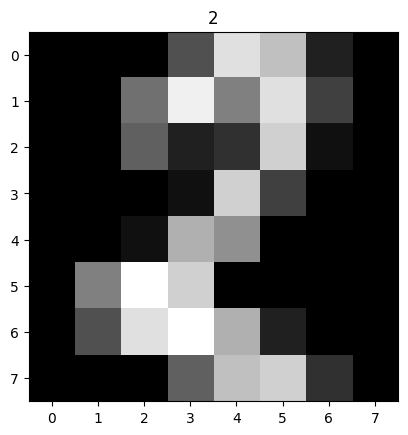

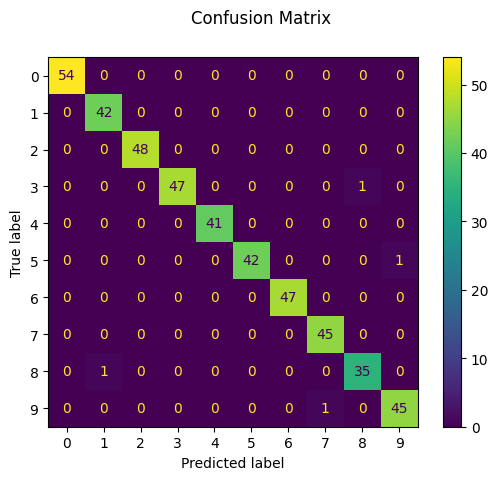

In [ ]:
# print('hello world!')

# datasets = Scikit learn built-in datasets, can use for coding practice
# metrics = allow us to analyse the performance of a model
# svm = Support Vector Machines = a type of machine learning algo that...
# can learn classifications in datasets

from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# sklearn.model_selection = this method can be used to split a dataset:
# data for training, and data for testing.
# matlablib can draw and show charts
# "as plt" = this gives the pyplot library a shorter nickname

digits = datasets.load_digits()

# digits contains images of digits 0-9. each image is a 8x8 array
images = digits.images
(print(images[50]))

# and labels a.k.a targets. each label is a number, 0-9...
# these labels are the correct answers for each image in "digits"...
labels = digits.target
print(labels[50])

# the low resolution image is great for practicing smaller ML tasks
# this is great for learning but...
# for complex image recognition tasks...
# you'll need to increase the image resolution.

# display some example digit data:
# use matplotlib to display a square for each pixel...
# the color of each square represents pixel color in the image.

p = plt.subplot()
# .subplot() prepares an area to draw image

index = 50

example_image = images[index] # [index] will display the 50th image
p.imshow(example_image, cmap='gray') # displays the image
# cmap = 'gray' the image will print shades of gray

p.set_title(labels[index]) # prints the label of the number as a title

number_of_images = len(images)
print(number_of_images)
# this is our 3D dataset...
# contains a length, the number of images, a height and a width.
# (height and width of each image)
# imagine each image is a piece of paper in a stack of papers: 3D dataset

print('Original data shape', images.shape)

# reshape means change the dimensions of the data, but don't change the data.
# the number of values represents the size of each new dimension.
# so if we have two values, we'll get a 2D array out.
# we want to have the same number of images, so the first dimension is the same.
# -1 means scikit will figure out what size the dimensions needs to be.
flat_images = images.reshape( (number_of_images, -1) )
print('Reshaped data shape', flat_images.shape)

# print an example image, and the re-shaped version
print('Example original', images[50])
print('Example reshaped', flat_images[50])


# split the flattened images and their labels into 4 datsets.
# this will split our data into training and testing sets.
# test_size is the proportion of images used for testing.
# shuffle means randomize the order of images to randomly assign them to test and training sets.
# test_size=0.25, 25% of data will go towards testing and the other 75% will go towards training models.
# flat_images = entire collection of flattened digit images (single row)


image_train, image_test, label_train, label_test = train_test_split(flat_images, labels, test_size=0.25, shuffle=True)

# Question: why do these datasets have these shapes?
print(image_train.shape) # the model will look at these images and labels to learn patterns
print(image_test.shape) # this is how you test the model after it has been trained
print(label_train.shape)
print(label_test.shape)

# Create the training model

classifier = svm.SVC(gamma=0.001) # gamma is a measure of how much each...
# training example affects the others.
# 0.001 is a starting point, we may adjust...
# to tune the behavior of the model.

# Train the model on the training datasets.
# Use ML algorithm to identify patterns in the image data,
# and how that affects what class each image is in.
classifier.fit(image_train, label_train)

# if we had a new picture of a number(s) we could ask the model to predict it
# unknown_number = ....
# prediction = classifier.predict( [ unknown_number ] )
# the argument is a list of unknown data ^

# test the model by making predictions
# ask the trained classifier model to predict the class...
# for each of the test images.

predictions = classifier.predict(image_test)

print(metrics.classification_report(label_test, predictions))

# Display confusion matrix, the total number of predictions...
# for all images of each class.
# Shows false negatives and false positives.
# Represents how much the model was confused. How many times did it fail?
# Can be useful to see what wrong predictions the model is making.
# if it confuses 1 and 7s we could add more 1s and 7s to the training data.

display = metrics.ConfusionMatrixDisplay.from_predictions(label_test, predictions)
display.figure_.suptitle("Confusion Matrix")
plt.show()






